<a href="https://colab.research.google.com/github/nandinib1999/edureka-assignments/blob/main/Edureka_DL_End_Course_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/drive/MyDrive/dataset-face-mask.zip"

Archive:  /content/drive/MyDrive/dataset-face-mask.zip
  inflating: dataset/without_mask/augmented_image_87.jpg  
  inflating: dataset/without_mask/augmented_image_93.jpg  
  inflating: dataset/without_mask/augmented_image_88.jpg  
  inflating: dataset/without_mask/augmented_image_80.jpg  
  inflating: dataset/without_mask/augmented_image_81.jpg  
  inflating: dataset/without_mask/augmented_image_91.jpg  
  inflating: dataset/without_mask/augmented_image_85.jpg  
  inflating: dataset/without_mask/augmented_image_96.jpg  
  inflating: dataset/without_mask/augmented_image_83.jpg  
  inflating: dataset/without_mask/augmented_image_90.jpg  
  inflating: dataset/without_mask/augmented_image_82.jpg  
  inflating: dataset/without_mask/augmented_image_92.jpg  
  inflating: dataset/without_mask/augmented_image_86.jpg  
  inflating: dataset/without_mask/augmented_image_99.jpg  
  inflating: dataset/without_mask/augmented_image_89.jpg  
  inflating: dataset/without_mask/augmented_image_97.jpg  
 

In [2]:
import os
from PIL import Image

DATA_DIR = "/content/dataset"
classes = ["with_mask", "without_mask"]

In [3]:
def get_image_paths(path_dir, class_id):
  image_path_label = []
  for image_name in os.listdir(os.path.join(path_dir, class_id)):
    img_path = os.path.join(path_dir, class_id, image_name)
    image_path_label.append([img_path, class_id])
  return image_path_label

In [4]:
train_test_img_path = get_image_paths(DATA_DIR, classes[0])
train_test_img_path.extend(get_image_paths(DATA_DIR, classes[1]))

In [5]:
len(train_test_img_path)

1376

In [6]:
import pandas as pd

df = pd.DataFrame(train_test_img_path, columns=['image_path', 'label'])
df.head()

image_path      label
0  /content/dataset/with_mask/augmented_image_147...  with_mask
1  /content/dataset/with_mask/augmented_image_235...  with_mask
2       /content/dataset/with_mask/381-with-mask.jpg  with_mask
3       /content/dataset/with_mask/408-with-mask.jpg  with_mask
4        /content/dataset/with_mask/73-with-mask.jpg  with_mask

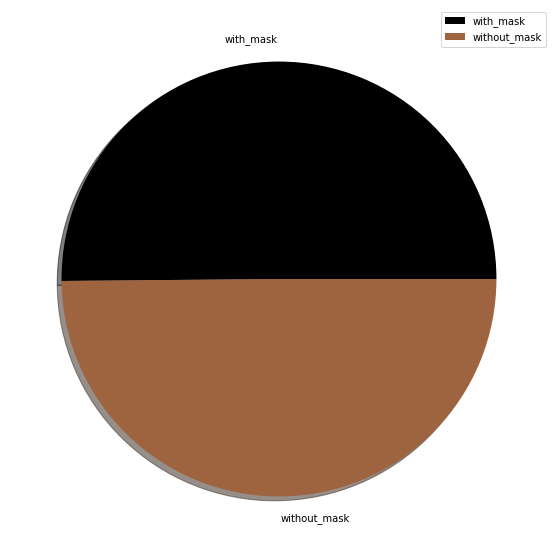

<Figure size 720x720 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(10, 10))
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / 2) for i in range(5)])
plt.figure(figsize=(10,10))
ax1.pie(df.label.value_counts(), labels=classes, shadow=True)
ax1.legend()
plt.show()

In [8]:
def visualize_imgs(df, sample_cnt):
    df = df.groupby('label',group_keys = False).apply(lambda df: df.sample(sample_cnt))
    df = df.reset_index(drop = True)
    
    for pt in range(sample_cnt):
        f, axarr = plt.subplots(1,2,figsize = (15,15))
        axarr[0].set_ylabel("Masks/No Masks")  
        temp = df[df.index.isin([pt + (sample_cnt*0),pt + (sample_cnt*1)])]
        for i in range(2):
          axarr[i].set_axis_off()
          axarr[i].imshow(Image.open(temp.image_path.iloc[i]).resize((150,150)))
          axarr[i].set_xlabel('Class '+str(temp.label.iloc[i]))
    plt.show()

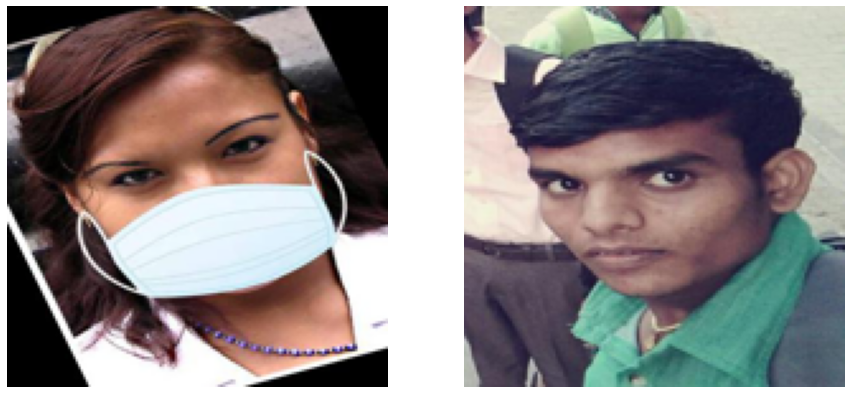

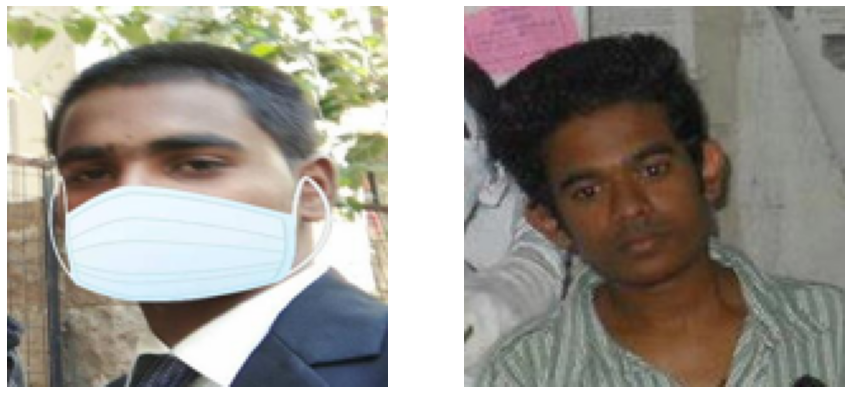

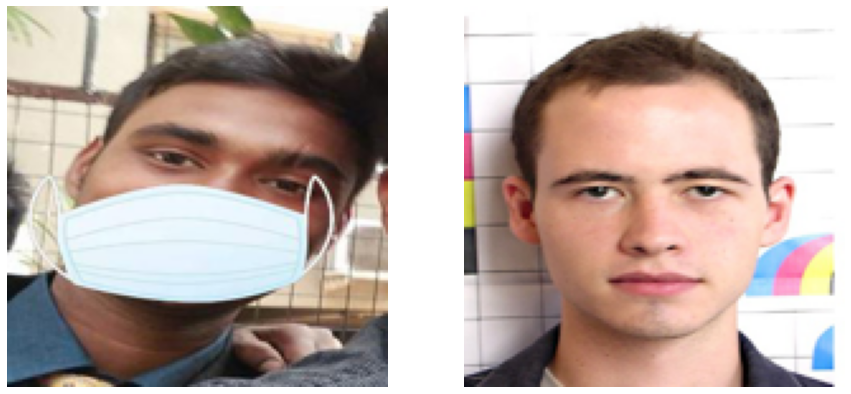

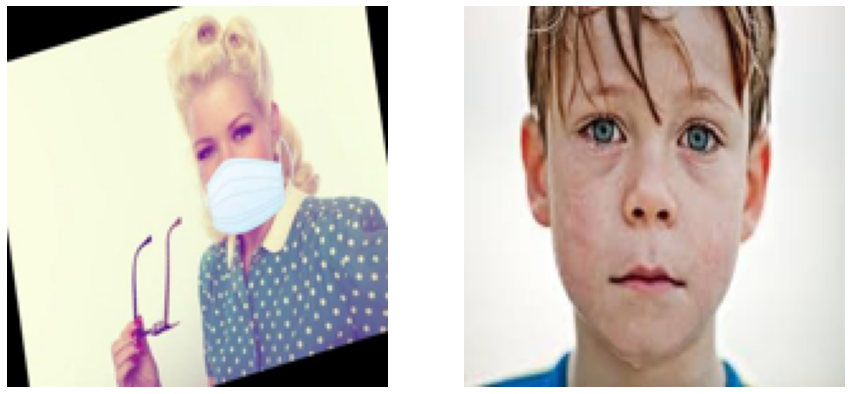

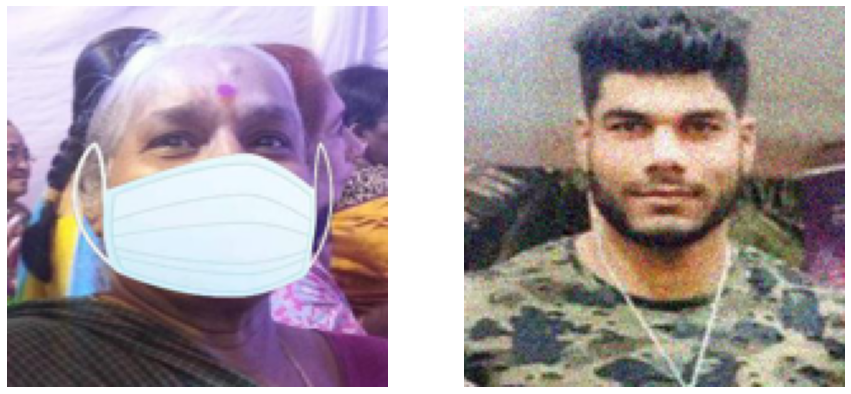

In [9]:
visualize_imgs(df, 5)

In [10]:
df = df.sample(frac = 1)
df.head()

image_path         label
1117  /content/dataset/without_mask/augmented_image_...  without_mask
460        /content/dataset/with_mask/392-with-mask.jpg     with_mask
357        /content/dataset/with_mask/399-with-mask.jpg     with_mask
658   /content/dataset/with_mask/augmented_image_251...     with_mask
857               /content/dataset/without_mask/215.jpg  without_mask

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.05, random_state=42, shuffle=True)

In [12]:
print("Training Data", train.shape)
print("Test Data", test.shape)

Training Data (1307, 2)
Test Data (69, 2)


In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from keras.activations import softmax
from keras.activations import elu
from keras.activations import relu
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import SGD, Adam
from keras.layers.normalization import BatchNormalization
import tensorflow as tf

In [14]:
BATCH_SIZE = 4
EPOCHS = 40
WARMUP_EPOCHS = 2
LEARNING_RATE = 1e-4
WARMUP_LEARNING_RATE = 1e-3
HEIGHT = 320
WIDTH = 320
CANAL = 3
N_CLASSES = train['label'].nunique()
ES_PATIENCE = 2
RLROP_PATIENCE = 3
DECAY_DROP = 0.5
IMG_DIM = 320

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                    validation_split=0.1, 
                                    horizontal_flip=True)

In [16]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train,
                                                    directory=DATA_DIR,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    target_size=(IMG_DIM, IMG_DIM),
                                                    subset='training',
                                                    shuffle=True
                                                    )

Found 1177 validated image filenames belonging to 2 classes.


In [17]:
valid_generator = train_datagen.flow_from_dataframe(dataframe=train,
                                                    directory=DATA_DIR,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    target_size=(IMG_DIM, IMG_DIM),
                                                    subset='validation',
                                                    shuffle=True
                                                    )

Found 130 validated image filenames belonging to 2 classes.


In [18]:
base_model = tf.keras.applications.Xception(include_top=False,
                                       input_shape=(None, None, 3),
                                       weights='imagenet')
base_model.trainable = False
layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
layer = tf.keras.layers.Dense(1024, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.5)(layer)
output = tf.keras.layers.Dense(N_CLASSES, activation='softmax')(layer)
model = tf.keras.models.Model(base_model.inputs,output)

83689472/83683744 [==============================] - 1s 0us/step


In [19]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print(STEP_SIZE_TRAIN,STEP_SIZE_VALID)

294 32


In [20]:
for layer in model.layers:
    layer.trainable = True

es = EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=RLROP_PATIENCE, factor=DECAY_DROP, min_lr=1e-6, verbose=1)

callback_list = [es, rlrop]
optimizer = Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss="binary_crossentropy",  metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
history_finetunning = model.fit_generator(generator=train_generator,
                                          steps_per_epoch=STEP_SIZE_TRAIN,
                                          validation_data=valid_generator,
                                          validation_steps=STEP_SIZE_VALID,
                                          epochs=EPOCHS,
                                          callbacks=callback_list,
                                          verbose=1).history

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
294/294 [==============================] - 92s 191ms/step - loss: 0.1171 - accuracy: 0.9488 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 2/40
294/294 [==============================] - 56s 191ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 3/40
294/294 [==============================] - 56s 190ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.8853e-05 - val_accuracy: 1.0000
Epoch 4/40
294/294 [==============================] - 56s 189ms/step - loss: 3.5611e-04 - accuracy: 1.0000 - val_loss: 7.1406e-05 - val_accuracy: 1.0000
Epoch 5/40
294/294 [==============================] - 56s 191ms/step - loss: 1.6664e-04 - accuracy: 1.0000 - val_loss: 3.7194e-05 - val_accuracy: 1.0000
Epoch 6/40
294/294 [==============================] - 56s 191ms/step - loss: 1.0687e-04 - accuracy: 1.0000 - val_loss: 2.9211e-05 - val_accuracy: 1.0000

Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 7/40
 51/294 [=

KeyboardInterrupt: ignored

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(dataframe=test,
                                                  directory = DATA_DIR,
                                                  x_col="image_path",
                                                  target_size=(HEIGHT, WIDTH),
                                                  batch_size=1,
                                                  shuffle=False,
                                                  class_mode=None)

Found 69 validated image filenames.


In [25]:
import numpy as np

test_generator.reset()
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_preds = model.predict_generator(test_generator, steps=STEP_SIZE_TEST,verbose = 1)
test_labels = [np.argmax(pred) for pred in test_preds]

 7/69 [==>...........................] - ETA: 1s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


69/69 [==============================] - 1s 14ms/step


In [32]:
true_labels = [0 if x == 'with_mask' else 1 for x in test.label.tolist()]

In [33]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

print("Accuracy for test: ", round(accuracy_score(true_labels, test_labels), 3))
print("Recall for test: ", round(recall_score(true_labels, test_labels), 3))
print("Precision for test: ", round(precision_score(true_labels, test_labels), 3))
print("------------------------------")
print("Classification Report")
print(classification_report(true_labels, test_labels))

Accuracy for test:  1.0
Recall for test:  1.0
Precision for test:  1.0
------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        33

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



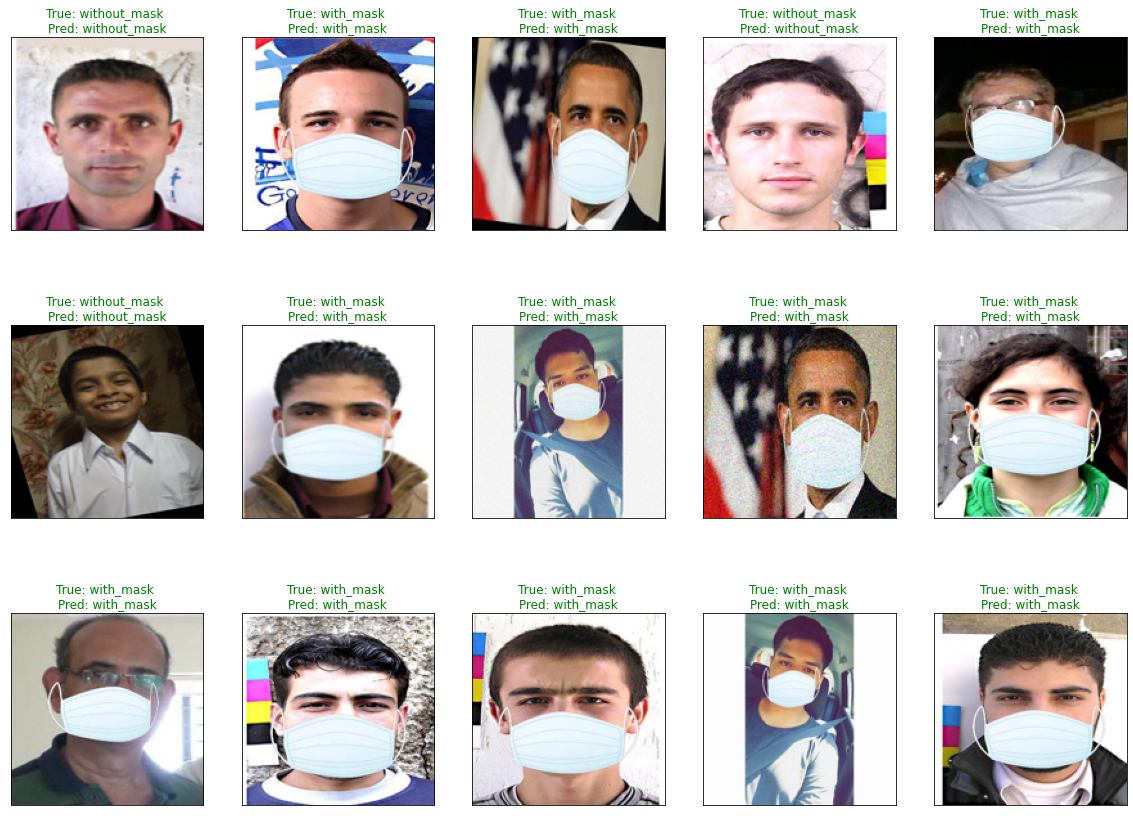

In [38]:
figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(np.random.choice(test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    img = Image.open(test.iloc[index, 0]).resize((150,150))
    ax.imshow(img)
    predict_index = true_labels[index]
    true_index = test_labels[index]
    # Set the title for each image
    title_color = ("green" if predict_index == true_index else "red")
    ax.set_title("True: {} \nPred: {}".format(classes[predict_index], classes[true_index]), color=title_color)
plt.show()

In [56]:
model_2 = tf.keras.Sequential()

model_2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(320, 320, 3))) 
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_2.add(tf.keras.layers.Dropout(0.3))

model_2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_2.add(tf.keras.layers.Dropout(0.3))

model_2.add(tf.keras.layers.Flatten())

model_2.add(tf.keras.layers.Dense(256, activation='relu'))
model_2.add(tf.keras.layers.Dropout(0.5))
model_2.add(tf.keras.layers.Dense(2, activation='sigmoid'))

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 320, 320, 64)      832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 160, 160, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 160, 160, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 160, 160, 32)      8224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 80, 80, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 80, 80, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 204800)           

In [57]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)

callback_list = [es]
optimizer = Adam(lr=LEARNING_RATE)
model_2.compile(optimizer=optimizer, loss="binary_crossentropy",  metrics=['accuracy'])
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 320, 320, 64)      832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 160, 160, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 160, 160, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 160, 160, 32)      8224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 80, 80, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 80, 80, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 204800)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [58]:
history = model_2.fit_generator(generator=train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=EPOCHS,
                              verbose=1,
                              callbacks=callback_list).history

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
294/294 [==============================] - 11s 35ms/step - loss: 0.5563 - accuracy: 0.7553 - val_loss: 0.3518 - val_accuracy: 0.9609
Epoch 2/40
294/294 [==============================] - 11s 36ms/step - loss: 0.2164 - accuracy: 0.9241 - val_loss: 0.2538 - val_accuracy: 0.9688
Epoch 3/40
294/294 [==============================] - 10s 35ms/step - loss: 0.1544 - accuracy: 0.9463 - val_loss: 0.2090 - val_accuracy: 0.9844
Epoch 4/40
294/294 [==============================] - 10s 35ms/step - loss: 0.1051 - accuracy: 0.9616 - val_loss: 0.1385 - val_accuracy: 0.9844
Epoch 5/40
294/294 [==============================] - 10s 35ms/step - loss: 0.0851 - accuracy: 0.9736 - val_loss: 0.1519 - val_accuracy: 0.9844
Epoch 6/40
294/294 [==============================] - 10s 35ms/step - loss: 0.0773 - accuracy: 0.9761 - val_loss: 0.1249 - val_accuracy: 0.9922
Epoch 7/40
294/294 [==============================] - 10s 36ms/step - loss: 0.0687 - accuracy: 0.9778 - val_loss: 0.1118 - val_accuracy:

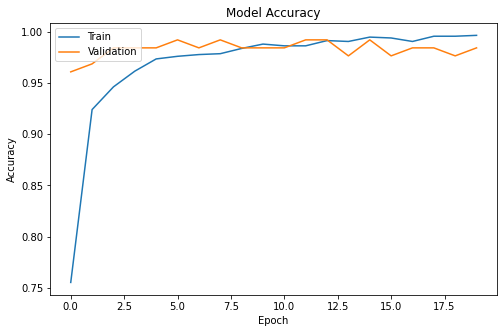

In [59]:
plt.figure(figsize=(8,5))

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

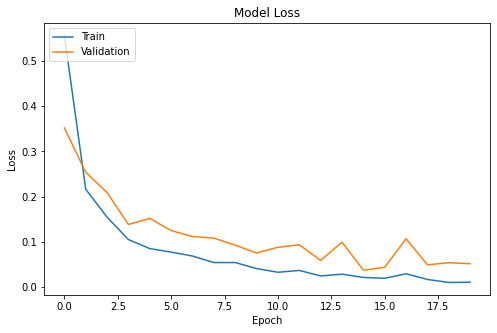

In [60]:
plt.figure(figsize=(8,5))

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

In [61]:
import numpy as np

test_generator.reset()
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_preds = model_2.predict_generator(test_generator, steps=STEP_SIZE_TEST,verbose = 1)
test_labels = [np.argmax(pred) for pred in test_preds]
true_labels = [0 if x == 'with_mask' else 1 for x in test.label.tolist()]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


69/69 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

print("Accuracy for test: ", round(accuracy_score(true_labels, test_labels), 3))
print("Recall for test: ", round(recall_score(true_labels, test_labels), 3))
print("Precision for test: ", round(precision_score(true_labels, test_labels), 3))
print("------------------------------")
print("Classification Report")
print(classification_report(true_labels, test_labels))

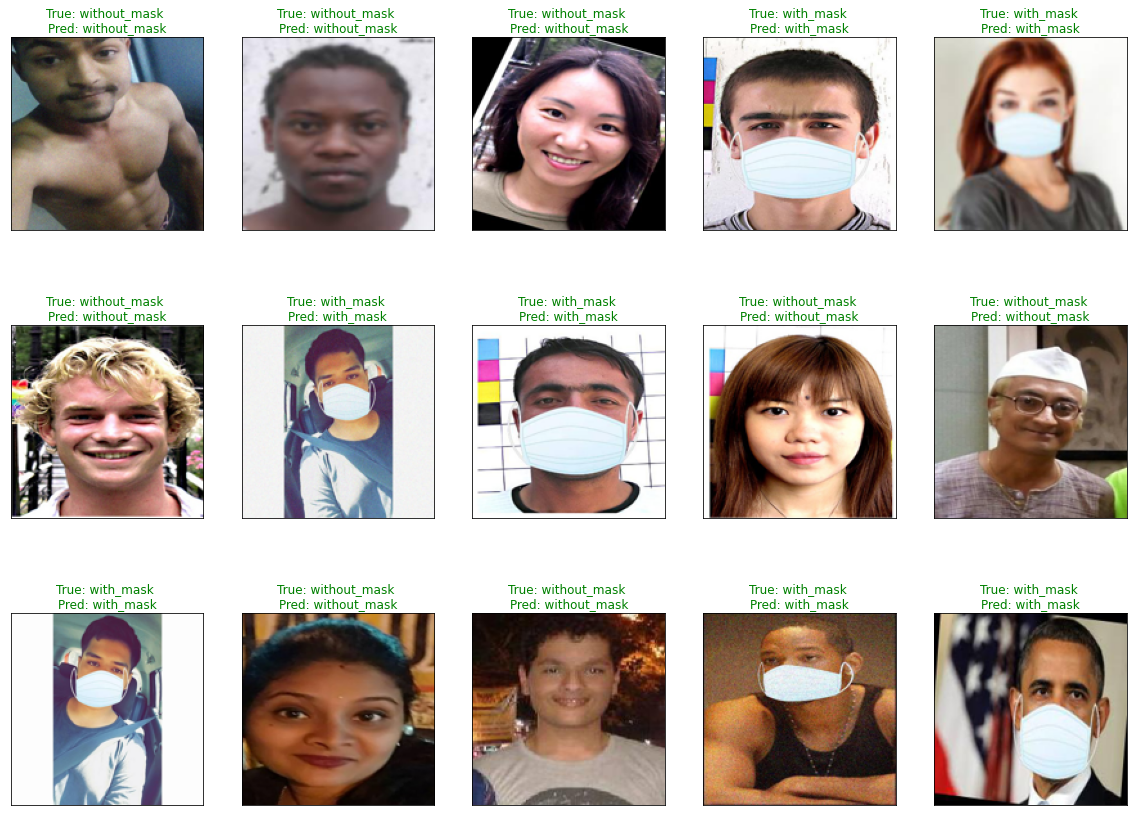

In [63]:
figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(np.random.choice(test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    img = Image.open(test.iloc[index, 0]).resize((150,150))
    ax.imshow(img)
    predict_index = true_labels[index]
    true_index = test_labels[index]
    # Set the title for each image
    title_color = ("green" if predict_index == true_index else "red")
    ax.set_title("True: {} \nPred: {}".format(classes[predict_index], classes[true_index]), color=title_color)
plt.show()